In [13]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

# Define ground truth data && Define artificial data
n_train, n_test, n_input, batch_size = 20, 100, 200, 5 # weights are n_inputs
true_w, true_b = torch.ones((n_input))*0.01, 1

train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)

test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)



# define a function which can train  with different values of lambdas

# plot the graph


In [29]:
def init_parameter():
#     w = torch.randn(n_input,1, requires_grad = True) # this is also working
    w = torch.normal(0,1,size = (n_input,1), requires_grad = True)
    b = torch.randn(1, requires_grad = True)
    return w,b;
    
# init_parameter()
# train_data

In [33]:
## define l2 regularization from basics
def l2_penalty(w):
#     return (w.T@w).sum()/2
    return torch.sum(w.pow(2))/2  # (||w||^2 )/ 2 

l2_penalty(torch.tensor([1,2,3,4]))

tensor(15.)

In [81]:
## training
def train(lambd, n_epochs = 10):
    w,b = init_parameter()
    net = lambda X: d2l.linreg(X, w, b)
    loss = d2l.squared_loss
#     n_epochs = 500 ## hyperparameter
    lr = 0.003
#     animator = d2l.Animator(xlabel = 'epochs', ylabel = 'loss', yscale = 'log', xlim = [5,n_epochs], legend = ['train', 'test'])
    
    for epoch in range(n_epochs):
        for X , y in train_iter:
            l = loss(net(X), y) + lambd*l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b], lr, batch_size)
#         if (epoch+1)%5==0:
#             animator.add(epoch+1, (d2l.evaluate_loss(net, train_iter, loss),
#                                   d2l.evaluate_loss(net, test_iter, loss)))
    print(lambd)
    return lambd, d2l.evaluate_loss(net, train_iter, loss),d2l.evaluate_loss(net, test_iter, loss)
                

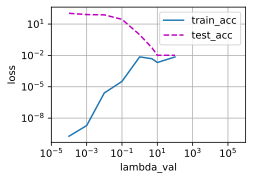

In [82]:
lambdas = [0.0001,0.001,0.01,0.1,1,5,10,100,1000,10000]
animator_lamd = d2l.Animator(xlabel='lambda_val', ylabel='loss', yscale='log', xscale='log',
                            xlim=[0.00001,1000000], legend=['train_acc', 'test_acc'])
for lam in lambdas:
    lam, train_acc, test_acc = train(lam,500)
    animator_lamd.add(lam, (train_acc, test_acc))

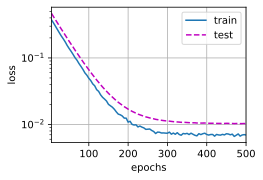

In [66]:
train(100)

In [55]:
def train2(lambd):
    w, b = init_parameter()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # The L2 norm penalty term has been added, and broadcasting
            # makes `l2_penalty(w)` a vector whose length is `batch_size`
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', torch.norm(w).item())

L2 norm of w: 13.557175636291504


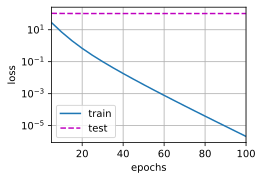

In [56]:
train2(0)

In [37]:
help(d2l.Animator)

Help on class Animator in module d2l.torch:

class Animator(builtins.object)
 |  Animator(xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1, figsize=(3.5, 2.5))
 |  
 |  For plotting data in animation.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1, figsize=(3.5, 2.5))
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  add(self, x, y)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [36]:
docstring = d2l.synthetic_data.__doc__
print(docstring)
help(d2l.synthetic_data)
help(d2l.load_array)
help(d2l.squared_loss)


Generate y = Xw + b + noise.
Help on function synthetic_data in module d2l.torch:

synthetic_data(w, b, num_examples)
    Generate y = Xw + b + noise.

Help on function load_array in module d2l.torch:

load_array(data_arrays, batch_size, is_train=True)
    Construct a PyTorch data iterator.

Help on function squared_loss in module d2l.torch:

squared_loss(y_hat, y)
    Squared loss.

